In [37]:
import os
import re
#import ROOT
import hist
from hist import Hist
from hist.axis import IntCategory, Regular, StrCategory
import pickle
import mplhep as hep
from glob import glob
import numpy as np
import awkward as ak
from tabulate import tabulate
from IPython import embed
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares
hep.style.use("CMS")
print("iminuit version:", iminuit.__version__)
import itertools
from collections import defaultdict
import glob

iminuit version: 2.30.1


In [38]:
## Load the data_storage from the previous run

if os.path.exists("data_storage_DesyTau.pkl"):
    with open("data_storage_DesyTau.pkl", "rb") as file:
        data_storage_dict = pickle.load(file)
    # Convert to defaultdict (optional, if you need default values)
    data_storage = defaultdict(lambda: {"values": [], "err": [], "colour": None, "location": None})
    # Load the data and update it
    data_storage.update(data_storage_dict)
else:
    data_storage = defaultdict(lambda: {"values": [], "err": [], "colour": None, "location": None})
#data_storage

file_path INPUT/01_DesyTau/control_plots/ff_exp_and_p2_tau_eta2p3_MTT_4Mev_odd/hist__var_phi_cp_mu_a1_3pr_pv.pickle
file_path INPUT/01_DesyTau/control_plots/ff_exp_and_p2_tau_eta2p3_MTT_4Mev_MM/hist__var_phi_cp_mu_a1_3pr_pv.pickle
file_path INPUT/01_DesyTau/control_plots/ff_exp_and_p2_tau_eta2p3_MTT_4Mev_SM/hist__var_phi_cp_mu_a1_3pr_pv.pickle
Saved individual .pickle file for cp_odd: INPUT/01_DesyTau/control_plots/combined_pickles/cp_odd__hist__var_phi_cp_mu_a1_3pr_pv.pickle
Saved individual .pickle file for cp_maxmix: INPUT/01_DesyTau/control_plots/combined_pickles/cp_maxmix__hist__var_phi_cp_mu_a1_3pr_pv.pickle
Saved individual .pickle file for cp_even: INPUT/01_DesyTau/control_plots/combined_pickles/cp_even__hist__var_phi_cp_mu_a1_3pr_pv.pickle
Saved combined .pickle file (all CP): INPUT/01_DesyTau/control_plots/combined_pickles/cp_all__hist__var_phi_cp_mu_a1_3pr_pv.pickle
file_path INPUT/01_DesyTau/control_plots/ff_exp_and_p2_tau_eta2p3_MTT_4Mev_odd/hist__var_phi_cp_mu_a1_3pr_dp.p

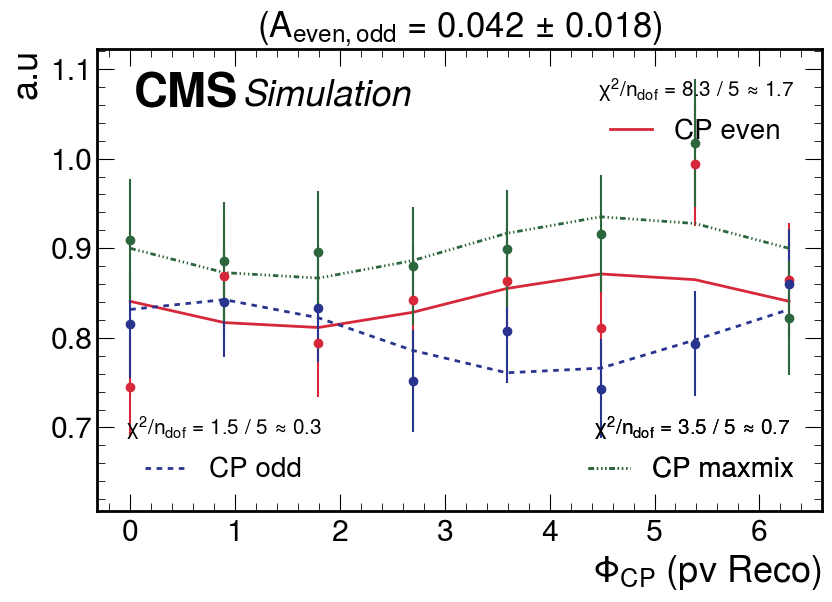

Checking file: INPUT/01_DesyTau/control_plots/combined_pickles/cp_all__hist__var_phi_cp_mu_a1_3pr_dp.pickle, looking for tag: pv
Skipping: INPUT/01_DesyTau/control_plots/combined_pickles/cp_all__hist__var_phi_cp_mu_a1_3pr_dp.pickle
Processing tag: dp
Checking file: INPUT/01_DesyTau/control_plots/combined_pickles/cp_all__hist__var_phi_cp_mu_a1_3pr_pv.pickle, looking for tag: dp
Skipping: INPUT/01_DesyTau/control_plots/combined_pickles/cp_all__hist__var_phi_cp_mu_a1_3pr_pv.pickle
Checking file: INPUT/01_DesyTau/control_plots/combined_pickles/cp_all__hist__var_phi_cp_mu_a1_3pr_dp.pickle, looking for tag: dp
Take file: INPUT/01_DesyTau/control_plots/combined_pickles/cp_all__hist__var_phi_cp_mu_a1_3pr_dp.pickle
>>>---- Processing file : INPUT/01_DesyTau/control_plots/combined_pickles/cp_all__hist__var_phi_cp_mu_a1_3pr_dp.pickle --->>>
>>>---- dp Reco
hypothesis,process:  cp_even 11102
process_axis,process_index :  IntCategory([11101, 11103, 11102], growth=True, name='process') 2
hypothesis,

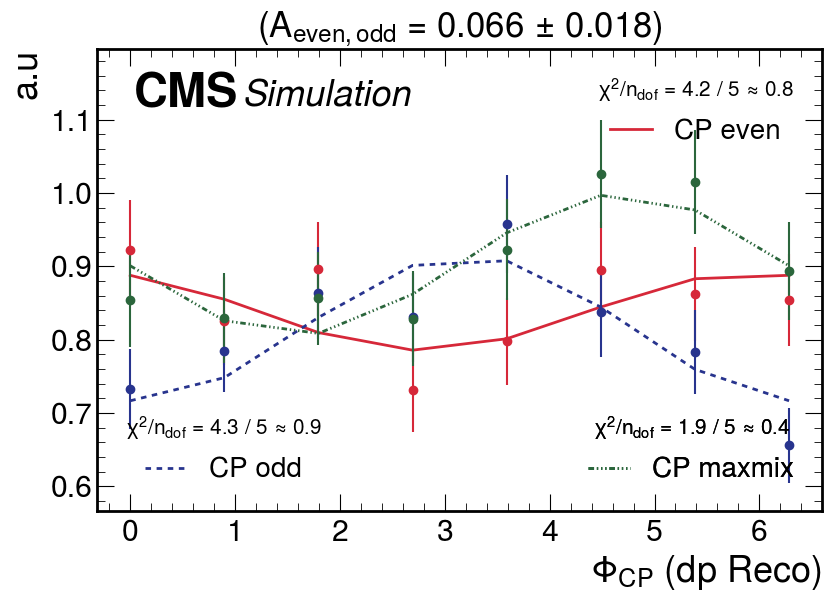

In [60]:
## Define the categories and tags
#tags = ["IPIP", "IPDP", "IPPV"]
tags = ["pv", "dp"]

catdict = {
    "cp_even" : 11102,
    "cp_odd" : 11101,
    "cp_maxmix" : 11103,
}
chosen_category = "cat_mutau_sr__tau2a1_3pr"

shiftdict = {
    "cp_even": {"shift": 150, "process":11102, "colour": "#d62839", "location": "upper right", "linestyle": "solid"},
    "cp_odd": {"shift": 151, "process":11101, "colour": "#28348e", "location": "lower left", "linestyle": (0, (2, 2))},
    "cp_maxmix": {"shift": 0, "process":11103, "colour": "#2b663c", "location": "lower right", "linestyle":(0, (2, 1, 0.5, 1, 0.5, 1, 0.5, 1))},
}

cp_map = {
    "ff_exp_and_p2_tau_eta2p3_MTT_4Mev_SM": "cp_even",
    "ff_exp_and_p2_tau_eta2p3_MTT_4Mev_odd": "cp_odd",
    "ff_exp_and_p2_tau_eta2p3_MTT_4Mev_MM": "cp_maxmix",
}

simpledict = {
    r"$\mu \pi$"     : "mupi",
    r"$\mu \rho$"    : "murho",
    r"$\mu a^{3p}_{1}$" : "mua13pr",
    r"$\mu \tau$" : "mutau",
    r"$\rho \rho 0j$" : "rhorho0j",
}

## Combine the Pickle files if needed
dir_name = "01_DesyTau/control_plots"

subdirs = [
    "ff_exp_and_p2_tau_eta2p3_MTT_4Mev_odd",
    "ff_exp_and_p2_tau_eta2p3_MTT_4Mev_MM",
    "ff_exp_and_p2_tau_eta2p3_MTT_4Mev_SM"
]

subdirs_vbf = [
"h_vbf_tautau_UncorrelatedDecay_Filtered"
]

base_dir = os.path.join("INPUT", dir_name)
place_combined_pickels = os.path.join(base_dir, "combined_pickles")
output_dir = os.path.join("OUTPUT", dir_name)
os.makedirs(place_combined_pickels, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

if "VBF" in dir_name:
    is_vbf = "VBF"
    subdirs = subdirs_vbf
else:
    is_vbf = "ggF"


file_names = set(os.path.basename(f) for f in glob.glob(os.path.join(base_dir, subdirs[0], "*.pickle")))


for file_name in file_names:
    combined_hist = None

    histograms_per_cp = {}

    for subdir in subdirs:
        file_path = os.path.join(base_dir, subdir, file_name)
        print("file_path", file_path)

        cp_key = cp_map[subdir]
        shift_value = shiftdict[cp_key]['shift']
        #print("shift_value, cp_key : ", shift_value, cp_key)

        with open(file_path, 'rb') as f:
            hist = pickle.load(f)
            test_hist = hist
            hist = hist[chosen_category]

        histograms_per_cp[cp_key] = hist

    # Save each CP hypothesis histogram separately
    for cp_key, hist in histograms_per_cp.items():
        output_path = os.path.join(place_combined_pickels, f"{cp_key}__{file_name}")
        with open(output_path, 'wb') as f:
            pickle.dump(hist, f)
        print(f"Saved individual .pickle file for {cp_key}: {output_path}")

    # Combine all histograms
    cp_keys = list(histograms_per_cp.keys())
    combined_hist = histograms_per_cp[cp_keys[0]].copy()  # make a copy to avoid modifying the original
    for cp_key in cp_keys[1:]:
        combined_hist += histograms_per_cp[cp_key]

    combined_output_path = os.path.join(place_combined_pickels, f"cp_all__{file_name}")
    with open(combined_output_path, 'wb') as f:
        pickle.dump(combined_hist, f)
    print(f"Saved combined .pickle file (all CP): {combined_output_path}")


## Loop over the tags and categories, do the fitting and save the results
for tag in tags:  # Loop over tags
    print(f"Processing tag: {tag}")
    file_list = glob.glob(f"{base_dir}/combined_pickles/cp_all__hist__*.pickle", recursive=True)
    
    for file in file_list:
        print(f"Checking file: {file}, looking for tag: {tag}")
        if tag in file:
            print(f"Take file: {file}")
        if tag not in file:
            print(f"Skipping: {file}")
            continue

        if "Gen" in file:
            is_gen = "Gen"
        elif "MTT" in dir_name and "PV" in tag:
            is_gen = "fastMTT"
        else:
            is_gen = "Reco"

        
        tag_kind = f"{tag} {is_gen}"
        print(f">>>---- Processing file : {file} --->>>")
        print(f">>>---- {tag_kind}")
        fileptr = open(file, 'rb')
        data = pickle.load(fileptr)
        nbin = data.shape[2]
        fileptr.close()

        if not hasattr(data, 'axes'):
            print(f"Warning: 'axes' not found in {file}. Skipping...")
            continue

        axes = data.axes
        process_axis  = axes['process']
        shift_axis = axes['shift']


        cparray = {}
        for shift, props in shiftdict.items():
            hypothesis = shift
            process = props["process"]
            colour = props["colour"]
            location = props["location"]
            linestyle = props["linestyle"]
            print("hypothesis,process: ",hypothesis,process)
                
            process_index = process_axis.index(props["process"]) #used to be shift-index
            print("process_axis,process_index : ", process_axis,process_index)
            values = data[process_index, :, :].values()
            # https://github.com/oponcet/CPinHToTauTau/blob/FF_dev_project/script_FF/fake_factor_derivation/src/input_processing.py#L133
            errors = data[process_index, :, :].variances() ** 0.5

            # store in data_storage
                    
            if hypothesis not in cparray:
                cparray[hypothesis] = {
                    "values": values,
                    "errors": errors,
                    "colour": colour,
                    "location": location,
                }
            else:
                # Add the new histogram values to the existing ones
                cparray[hypothesis]["values"] += values
                cparray[hypothesis]["errors"] = (cparray[hypothesis]["errors"]**2 + errors**2)**0.5


        def model(x, a, b, c):
            return a*np.cos(x+c) + b

        def fit(x, y, err=0.05, model=model):
            lsq = LeastSquares(x, y, err, model)
            m = Minuit(lsq, a=0.1, b=0.1, c=1.0)
            #m.scan(ncall=100)
            m.fixed = False
            m.migrad()  # finds minimum of least_squares function
            m.hesse()  # accurately computes uncertainties
            return m, err, m.values["a"], m.errors["a"], m.values["b"], m.errors["b"], m.values["c"]

        def comp_asymmetry(arr1, arr2):
            # https://github.com/Ksavva1021/TIDAL/blob/656f992ae056b3fed0061f2b3efb49905c39834d/CP_Tools/scripts/assymetry.py#L26
            return (1/arr1.size)*np.sum(np.abs((arr1-arr2)/(arr1+arr2)))

        def comp_asymmetry_error(arr1, arr2, err1, err2): #arr = array of values, err = array of errors
            # Terms for partial derivatives
            denom = arr1 + arr2
            term1 = err1 * np.abs((2 * arr2) / (denom**2))
            term2 = err2 * np.abs((2 * arr1) / (denom**2))
            # Propagate errors
            sigma_A = np.sqrt(np.sum(term1**2 + term2**2)) / arr1.size
            return sigma_A

        x = np.linspace(0., 2*np.pi, nbin)


        

        #for cat, val in cparray.items():  # Loop over categories (DMs)
        #    print("cat : ", cat)
        #    if len(val) == 0:
        #        print(f"WARNING : {cat} has an empty dict")
        #        continue
            
        plt.figure(figsize=(8.9, 6.6))
        hep.cms.text("Simulation", loc=1)
        line_width = 2
        legend_line_width = line_width

        ## Initialise category in data_storage if not already there
        #if cat not in data_storage:
        #    data_storage[cat] = {
        #        f"{dir_name}": {},  # Initialise the tags key to store per-category tags
        #    }
        #if dir_name not in data_storage[cat]:
        #    data_storage[cat][dir_name] = {}
        #if tag_kind not in data_storage[cat][dir_name]:
        #    data_storage[cat][dir_name][tag_kind] = {}

        for hyp, shift_props in shiftdict.items():  # Loop over hypotheses
            shift, process, colour, location, linestyle = shift_props["shift"], shift_props["process"], shift_props["colour"], shift_props["location"], shift_props["linestyle"]
            #print("hyp : ", hyp, "shift_props :", shift_props) #hyp = shift

            hypothesis_zip = cparray[hyp]  # gives per hypothesis: {'values': array, 'errors': array, '...': 'black', 'location': '...'}
            hypothesis_fit_vals, hypothesis_fit_errs = np.ravel(hypothesis_zip["values"]), np.ravel(hypothesis_zip["errors"])

            # Fit the Hypothesis
            m, err, a, sigma_a, b, sigma_b, c = fit(x, hypothesis_fit_vals, hypothesis_fit_errs)


            if tag_kind not in data_storage[dir_name]:  
                data_storage[dir_name][tag_kind] = {}  # Initialise tag_kind in [tag_kind] if not already there

            data_storage[dir_name][tag_kind][hyp] = {  # Directly use hypothesis name
                "values": np.array(hypothesis_fit_vals), # hypothesis_fit_vals.tolist(),
                "err": err,
                "colour": colour,
                "location": location,
                #"m": m,
            }


            # Plot the results
            plt.errorbar(x, hypothesis_fit_vals, hypothesis_fit_errs, fmt="o", color=colour)
            fit_curve = model(x, *m.values)
            plt.plot(x, fit_curve, color=colour, linestyle=linestyle, linewidth=line_width)
            fit_info = [
                f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {m.fval:.1f} / {m.ndof:.0f} ≈ {m.fmin.reduced_chi2:.1f}",
            ]
            legend_handle = Line2D([0], [0], color=colour, linestyle=linestyle, linewidth=legend_line_width, label=f"CP {hyp[3:]}")
            legend = plt.legend(handles=[legend_handle], title="\n".join(fit_info), frameon=False, loc=location, fontsize=20, title_fontsize=15)
            plt.gca().add_artist(legend)

            fit_y_min = np.min(fit_curve)
            fit_y_max = np.max(fit_curve)
            y_min = fit_y_min - 0.3 * fit_y_min
            y_max = fit_y_max + 0.2 * fit_y_max
            plt.ylim(y_min, y_max)

        for category1, category2 in itertools.combinations(shiftdict.keys(), 2):  # Loop over pairs of hypotheses (asymmetry calculations)
            hypothesis1 = np.ravel(cparray[category1]["values"])
            hypothesis2 = np.ravel(cparray[category2]["values"])
            error1 = np.ravel(cparray[category1]["errors"])
            error2 = np.ravel(cparray[category2]["errors"])

            asymmetry = comp_asymmetry(hypothesis1, hypothesis2)
            asymmetry_error = comp_asymmetry_error(hypothesis1, hypothesis2, error1, error2)

            combo_name = f"{category1}_vs_{category2}"
            print("combo_name : ", combo_name)

            if combo_name not in data_storage[dir_name][tag_kind]:
                data_storage[dir_name][tag_kind][combo_name] = {}  # Initialize combo_name under tag_kind if not already there

            # Store the asymmetry result for this category and tag_kind
            data_storage[dir_name][tag_kind][combo_name]["asymmetry_val"] = asymmetry
            data_storage[dir_name][tag_kind][combo_name]["asymmetry_error"] = asymmetry_error


        # Save the final plot
        asymmetry_val_even_odd = data_storage[dir_name][tag_kind]["cp_even_vs_cp_odd"]["asymmetry_val"]
        asymmetry_error_even_odd = data_storage[dir_name][tag_kind]["cp_even_vs_cp_odd"]["asymmetry_error"]
        asymmetry_val_even_odd_rounded = round(asymmetry_val_even_odd, 3)
        asymmetry_error_even_odd_rounded = round(asymmetry_error_even_odd, 3)

        x_label = r"$\Phi_{CP}$" + f" ({tag_kind})"
        #if is_gen == "Gen":
        #    x_label += " (Gen)"

        plt.xlabel(x_label)
        plt.ylabel("a.u")
        plt.title(f"($A_{{even,odd}}$ = {asymmetry_val_even_odd_rounded}$\\,\\pm\\,${asymmetry_error_even_odd_rounded})", fontsize=25, loc='center')
        plt.tight_layout()
        plt.savefig(f"{output_dir}/{tag_kind}_{is_gen}_{is_vbf}.pdf", dpi=300)
        plt.show()
            

In [61]:
m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.946 (χ²/ndof = 0.4)      │              Nfcn = 109              │
│ EDM = 1.28e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -0.10   │   0.04    │            │            │         │         │       │
│ 1 │ b    │   0.902   │   0.024   │            │            │         │         │       │
│ 2 │ c    │   -1.55   │   0.33    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │  0.00129  -0.1e-3  -0.0001 │
│ b │  -0.1e-3 0.000575   1.5e-3 │
│ c │  -0.0001   1.5e-3    0.106 │
└───┴────────────────────────────┘

In [46]:
test_hist[chosen_category].shape

(1, 1, 8)

In [56]:
nbin = test_hist[chosen_category].shape[2]
nbin = data.shape[2]

In [57]:
nbin

8

In [515]:
def print_nested_keys(d, prefix=""):
    if isinstance(d, dict):
        for key, value in d.items():
            new_prefix = f"{prefix} -> {key}" if prefix else key
            print(new_prefix)
            print_nested_keys(value, new_prefix)

print_nested_keys(data_storage)

01_DesyTau/control_plots
01_DesyTau/control_plots -> values
01_DesyTau/control_plots -> err
01_DesyTau/control_plots -> colour
01_DesyTau/control_plots -> location
01_DesyTau/control_plots -> IPPV Reco
01_DesyTau/control_plots -> IPPV Reco -> cp_even
01_DesyTau/control_plots -> IPPV Reco -> cp_even -> values
01_DesyTau/control_plots -> IPPV Reco -> cp_even -> err
01_DesyTau/control_plots -> IPPV Reco -> cp_even -> colour
01_DesyTau/control_plots -> IPPV Reco -> cp_even -> location
01_DesyTau/control_plots -> IPPV Reco -> cp_odd
01_DesyTau/control_plots -> IPPV Reco -> cp_odd -> values
01_DesyTau/control_plots -> IPPV Reco -> cp_odd -> err
01_DesyTau/control_plots -> IPPV Reco -> cp_odd -> colour
01_DesyTau/control_plots -> IPPV Reco -> cp_odd -> location
01_DesyTau/control_plots -> IPPV Reco -> cp_maxmix
01_DesyTau/control_plots -> IPPV Reco -> cp_maxmix -> values
01_DesyTau/control_plots -> IPPV Reco -> cp_maxmix -> err
01_DesyTau/control_plots -> IPPV Reco -> cp_maxmix -> colour
01_D

# Compare the asymmetries + errors

In [504]:
colour_palette = ["#d62839", "#28348e", "#2b663c"]

def compare_asymmetries(data_storage, selected_cats=None, selected_datasets=None, selected_tags=None, selected_keys=None):
    if selected_cats is None:
        selected_cats = list(data_storage.keys())
    if selected_datasets is None:
        selected_datasets = [ds for cat in selected_cats for ds in data_storage[cat].keys()]
    if selected_keys is None:
        selected_keys = [key for cat in selected_cats for ds in selected_datasets for tag in selected_tags for key in data_storage[cat][ds].get(tag, {}).keys()]

    print("selected_cats", selected_cats)
    print("selected_datasets:", selected_datasets)
    print("selected_tags", selected_tags)
    print("selected_keys", selected_keys)

    used_tags = {}
    for tag in selected_tags:
        if "Gen" in tag:
            #used_tags[tag] = r"full $p_T^{\tau}$ (Gen)"
            used_tags[tag] = r"gen $p_T^{\tau}$"
        elif "Reco" in tag:
            used_tags[tag] = r"visible $p_T^{\tau}$"
        elif "fastMTT" in tag:
            used_tags[tag] = r"fastMTT $p_T^{\tau}$"
        else:
            used_tags[tag] = tag

    info_text = []
    
    if len(selected_cats) == 1:
        if selected_cats[0] == '$\\mu a^{3p}_{1}$':
            info_text.append(r"Category $\mu a^{3p}$")
        else:
            info_text.append(f"Category : {selected_cats[0]}")
    if len(selected_datasets) == 1:
        info_text.append(f"Version : {selected_datasets[0]}")
    if len(selected_tags) == 1:
        info_text.append(f"Method : {selected_tags[0]}")
    if len(selected_keys) == 1:
        info_text.append(f"Asymmetry of : {selected_keys[0]}")

    # Replace _ with spaces
    info_text = "\n".join(line.replace("_", " ").replace("cp", "CP") for line in info_text) if info_text else None

    asymmetry_values = []
    asymmetry_errors = []
    labels = []
    colours = []
    dir_names = []  # <--- New list to store dir_name

    colour_map = {dir_name: colour_palette[i % len(colour_palette)] for i, dir_name in enumerate(selected_datasets)}
    legend_handles = {}

    for cat in selected_cats:
        if cat not in data_storage:
            continue

        for dir_name in selected_datasets:
            print("dir_name 1) : ", dir_name)
            if dir_name not in data_storage[cat]:
                continue
            colour = colour_map[dir_name]
            if dir_name not in legend_handles:
                legend_handles[dir_name] = plt.Line2D([0], [0], marker='o', color=colour, linestyle='None', label=dir_name)

            available_tags = [tag for tag in selected_tags if tag in data_storage[cat][dir_name]]

            for tag in available_tags:
                for key in selected_keys:
                    if key in data_storage[cat][dir_name][tag]:
                        data_entry = data_storage[cat][dir_name][tag][key]

                        if "_vs_" in key and "asymmetry_val" in data_entry and "asymmetry_error" in data_entry:
                            asymmetry_values.append(data_entry["asymmetry_val"])
                            asymmetry_errors.append(data_entry["asymmetry_error"])
                            dir_names.append(dir_name)  # <--- store dir_name as well

                            label_parts = []
                            if len(selected_cats) > 1:
                                label_parts.append(cat)
                            if len(selected_tags) > 1:
                                label_parts.append(tag)
                            if len(selected_keys) > 1:
                                label_parts.append(key)

                            labels.append(" - ".join(label_parts))
                            colours.append(colour)


    asymmetry_values = np.array(asymmetry_values)
    asymmetry_errors = np.array(asymmetry_errors)

    plt.figure(figsize=(7.7, 5.5))
    hep.cms.text("Private work", loc=0)

    unique_labels = list(dict.fromkeys(labels))
    label_to_xpos = {label: i for i, label in enumerate(unique_labels)}
    # Make sure that all lists are of the same length
    assert len(labels) == len(asymmetry_values) == len(asymmetry_errors) == len(dir_names)

    max_values = {}
    max_errors = {}
    max_values_vbf = {}
    max_errors_vbf = {}

    # Use dir_names to correctly assign ggF and VBF
    for label, value, error, dir_name in zip(labels, asymmetry_values, asymmetry_errors, dir_names):
        print("dir_name : ", dir_name)
        if "VBF" in dir_name:  # if VBF-Dataset
            print(f"VBF erkannt: {dir_name}, label: {label}, value: {value}")
            if label not in max_values_vbf or value > max_values_vbf[label]:
                max_values_vbf[label] = value
                max_errors_vbf[label] = error
        else:  # if ggF-Dataset
            print(f"ggF erkannt: {dir_name}, label: {label}, value: {value}")

            if label not in max_values or value > max_values[label]:
                max_values[label] = value
                max_errors[label] = error
    filtered_labels = list(set(max_values.keys()) | set(max_values_vbf.keys()))
    print("filtered_labels: ",filtered_labels)
    filtered_values = [max_values.get(label, 0) for label in filtered_labels]
    filtered_errors = [max_errors.get(label, 0) for label in filtered_labels]

    filtered_values_vbf = [max_values_vbf.get(label, 0) for label in filtered_labels]
    filtered_errors_vbf = [max_errors_vbf.get(label, 0) for label in filtered_labels]

    filtered_x_positions = [label_to_xpos[label] for label in filtered_labels]
    
    width = 0.19
    gap = 0.02
    
    # Plot bars for ggF
    plt.bar(filtered_x_positions, filtered_values, yerr=filtered_errors, width=width, label="ggF", color=colour_palette[0], capsize=5)
    # Plot bars for VBF slightly shifted to the right
    plt.bar([x + width + gap for x in filtered_x_positions], filtered_values_vbf, yerr=filtered_errors_vbf, width=width, label="VBF", color=colour_palette[1], capsize=5)

    # Labels, legend, and formatting
    plt.legend()

    gen_max = max([val for lbl, val in zip(labels, asymmetry_values) if lbl == "IPPV Gen"]) #here
    gen_max_error = next(err for lbl, val, err in zip(labels, asymmetry_values, asymmetry_errors) if lbl == "IPPV Gen") #here

    for label, max_val in max_values.items():
        max_err = max_errors[label]
        x_pos = label_to_xpos[label]

        percent = 100 if label == "IPPV Gen" else (max_val / gen_max) * 100 #here
        percent_err = percent * np.sqrt((max_err / max_val) ** 2 + (gen_max_error / gen_max) ** 2)

        ## Percentages as text for 1 prod channel
        #plt.text(x_pos, max_val + 0.015, f"\n\n{percent:.1f} ± {percent_err:.1f}%", ha="center", fontsize=10, color="black")

    if asymmetry_values.size > 0:
        A_y_min = np.min(asymmetry_values)
        A_y_max = np.max(asymmetry_values)
        y_max = A_y_max + 0.4 * A_y_max
        plt.ylim(0, y_max)

    mapped_labels = [used_tags.get(label, label) for label in filtered_labels]
    #plt.xticks(ticks=filtered_x_positions, labels=mapped_labels, rotation=45)
    plt.xticks(ticks=[x + (width / 2) + (gap / 2) for x in filtered_x_positions], labels=mapped_labels, rotation=45)


    plt.margins(x=0.1)
    plt.ylabel("Asymmetry")
    #plt.title("Comparison of Asymmetries", pad=45)

    if info_text:
        plt.annotate(info_text, xy=(0.05, 0.83), xycoords="axes fraction", fontsize=14,
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))
    
    plt.grid()
    plt.savefig("OUTPUT/Asymmetry.pdf", dpi=300, bbox_inches='tight') #herename
    plt.show()



In [516]:
compare_asymmetries(data_storage)
#compare_asymmetries(data_storage, 
#                    selected_cats=['$\\mu a^{3p}_{1}$'],
#                    selected_datasets=['control_plots_full_config',
#                                       'Run3_preEE_2022_full_18_feb_fastMTT_GammaH0p004',
#                                       'Run3_preEE_2022_full_18_feb_fastMTT_mH0p01',
#                                       'VBF_control_plots','VBF_w_MTT'],
#                    selected_tags=['IPPV Gen', 'IPPV Reco', 'IPPV fastMTT'],
#                    selected_keys=['cp_even_vs_cp_odd'])

TypeError: 'NoneType' object is not iterable

In [517]:
# Before saving: convert defaultdict to dict
data_storage_dict = {k: dict(v) for k, v in data_storage.items()}

# Save data_storage to YAML
with open("data_storage_DesyTau.pkl", "wb") as file:
    pickle.dump(data_storage_dict, file) 


In [495]:
colour_palette = ["#d62839", "#28348e", "#2b663c"]

def compare_asymmetries(data_storage, selected_cats=None, selected_datasets=None, selected_tags=None, selected_keys=None):
    if selected_cats is None:
        selected_cats = list(data_storage.keys())
    if selected_datasets is None:
        selected_datasets = [ds for cat in selected_cats for ds in data_storage[cat].keys()]
    if selected_keys is None:
        selected_keys = [key for cat in selected_cats for ds in selected_datasets for tag in selected_tags for key in data_storage[cat][ds].get(tag, {}).keys()]

    print("selected_cats", selected_cats)
    print("selected_datasets:", selected_datasets)
    print("selected_tags", selected_tags)
    print("selected_keys", selected_keys)

    used_tags = {}
    for tag in selected_tags:
        if "Gen" in tag:
            #used_tags[tag] = r"full $p_T^{\tau}$ (Gen)"
            used_tags[tag] = r"gen $p_T^{\tau}$"
        elif "Reco" in tag:
            used_tags[tag] = r"visible $p_T^{\tau}$"
        elif "fastMTT" in tag:
            used_tags[tag] = r"fastMTT $p_T^{\tau}$"
        else:
            used_tags[tag] = tag

    info_text = []
    
    if len(selected_cats) == 1:
        if selected_cats[0] == '$\\mu a^{3p}_{1}$':
            info_text.append(r"Category $\mu a^{3p}$")
        else:
            info_text.append(f"Category : {selected_cats[0]}")
    if len(selected_datasets) == 1:
        info_text.append(f"Version : {selected_datasets[0]}")
    if len(selected_tags) == 1:
        info_text.append(f"Method : {selected_tags[0]}")
    if len(selected_keys) == 1:
        info_text.append(f"Asymmetry of : {selected_keys[0]}")

    # Replace _ with spaces
    info_text = "\n".join(line.replace("_", " ").replace("cp", "CP") for line in info_text) if info_text else None

    asymmetry_values = []
    asymmetry_errors = []
    labels = []
    colours = []
    dir_names = []  # <--- New list to store dir_name

    colour_map = {dir_name: colour_palette[i % len(colour_palette)] for i, dir_name in enumerate(selected_datasets)}
    legend_handles = {}

    for cat in selected_cats:
        if cat not in data_storage:
            continue

        for dir_name in selected_datasets:
            print("dir_name 1) : ", dir_name)
            if dir_name not in data_storage[cat]:
                continue
            colour = colour_map[dir_name]
            if dir_name not in legend_handles:
                legend_handles[dir_name] = plt.Line2D([0], [0], marker='o', color=colour, linestyle='None', label=dir_name)

            available_tags = [tag for tag in selected_tags if tag in data_storage[cat][dir_name]]

            for tag in available_tags:
                for key in selected_keys:
                    if key in data_storage[cat][dir_name][tag]:
                        data_entry = data_storage[cat][dir_name][tag][key]

                        if "_vs_" in key and "asymmetry_val" in data_entry and "asymmetry_error" in data_entry:
                            asymmetry_values.append(data_entry["asymmetry_val"])
                            asymmetry_errors.append(data_entry["asymmetry_error"])
                            dir_names.append(dir_name)  # <--- store dir_name as well

                            label_parts = []
                            if len(selected_cats) > 1:
                                label_parts.append(cat)
                            if len(selected_tags) > 1:
                                label_parts.append(tag)
                            if len(selected_keys) > 1:
                                label_parts.append(key)

                            labels.append(" - ".join(label_parts))
                            colours.append(colour)


    asymmetry_values = np.array(asymmetry_values)
    asymmetry_errors = np.array(asymmetry_errors)

    #plt.figure(figsize=(7.7, 5.5))
    plt.figure(figsize=(7.7, 6.6))
    hep.cms.text("Private work", loc=0)

    unique_labels = list(dict.fromkeys(labels))
    label_to_xpos = {label: i for i, label in enumerate(unique_labels)}
    # Make sure that all lists are of the same length
    assert len(labels) == len(asymmetry_values) == len(asymmetry_errors) == len(dir_names)

    max_values = {}
    max_errors = {}
    max_values_vbf = {}
    max_errors_vbf = {}

    # Use dir_names to correctly assign ggF and VBF
    for label, value, error, dir_name in zip(labels, asymmetry_values, asymmetry_errors, dir_names):
        print("dir_name : ", dir_name)
        if "VBF" in dir_name:  # if VBF-Dataset
            print(f"VBF erkannt: {dir_name}, label: {label}, value: {value}")
            if label not in max_values_vbf or value > max_values_vbf[label]:
                max_values_vbf[label] = value
                max_errors_vbf[label] = error
        else:  # if ggF-Dataset
            print(f"ggF erkannt: {dir_name}, label: {label}, value: {value}")
        
            if label not in max_values or value > max_values[label]:
                max_values[label] = value
                max_errors[label] = error
    filtered_labels = list(set(max_values.keys()) | set(max_values_vbf.keys()))
    print("filtered_labels: ",filtered_labels)
    filtered_values = [max_values.get(label, 0) for label in filtered_labels]
    filtered_errors = [max_errors.get(label, 0) for label in filtered_labels]

    filtered_values_vbf = [max_values_vbf.get(label, 0) for label in filtered_labels]
    filtered_errors_vbf = [max_errors_vbf.get(label, 0) for label in filtered_labels]

    filtered_x_positions = [label_to_xpos[label] for label in filtered_labels]
    
    width = 0.19
    gap = 0.02
    
    # Plot bars for ggF
    plt.bar(filtered_x_positions, filtered_values, yerr=filtered_errors, width=width, label="ggF", color=colour_palette[0], capsize=5)
    # Plot bars for VBF slightly shifted to the right
    plt.bar([x + width + gap for x in filtered_x_positions], filtered_values_vbf, yerr=filtered_errors_vbf, width=width, label="VBF", color=colour_palette[1], capsize=5)

    # Labels, legend, and formatting
    plt.legend()

    
    # Maximum value and error for GGF
    gen_max_ggf = max(
        val for lbl, dirname, val in zip(labels, dir_names, asymmetry_values)
        if lbl == "IPDP Gen" and "vbf" not in dirname.lower()
    )
    
    gen_max_error_ggf = next(
        err for lbl, dirname, err in zip(labels, dir_names, asymmetry_errors)
        if lbl == "IPDP Gen" and "vbf" not in dirname.lower()
    )
    
    # Maximum value and error for VBF
    gen_max_vbf = max(
        val for lbl, dirname, val in zip(labels, dir_names, asymmetry_values)
        if lbl == "IPDP Gen" and "vbf" in dirname.lower()
    )
    
    gen_max_error_vbf = next(
        err for lbl, dirname, val, err in zip(labels, dir_names, asymmetry_values, asymmetry_errors)
        if lbl == "IPDP Gen" and "vbf" in dirname.lower()
    )

    for lbl, dirname, val in zip(labels, dir_names, asymmetry_values):
        print(f"gen_max_ggf: {gen_max_ggf}, lbl: {lbl}, dirname: {dirname}, val: {val} ")
        print(f"gen_max_vbf: {gen_max_vbf}, lbl: {lbl}, dirname: {dirname}, val: {val} ")


    # First: labels on top of ggF bars (left bars)
    for label in max_values:
        max_val = max_values[label]
        max_err = max_errors[label]
        x_pos = label_to_xpos[label]
    
        # Calculate percentage for ggF: it should be less than 100 if reco is smaller than gen
        percent = 100 if label == "IPDP Gen" else (max_val / gen_max_ggf) * 100
        percent_err = percent * np.sqrt((max_err / max_val) ** 2 + (gen_max_error_ggf / gen_max_ggf) ** 2)
    
        # Slightly to the left (aligned with ggF bar)
        #plt.text(x_pos - 0.02, max_val + 0.0075, f"{percent:.1f} ± {percent_err:.1f}%", ha="center", fontsize=10, color=colour_palette[0], zorder=10)
    
        print(f"VBF max_val: {max_val}, gen_max_ggf: {gen_max_ggf}, percent: {percent}, percent_error: {percent_err}")
    
    # Second: labels on top of VBF bars (right bars)
    for label in max_values_vbf:
        max_val = max_values_vbf[label]
        max_err = max_errors_vbf[label]
        x_pos = label_to_xpos[label] + width + gap
    
        # Calculate percentage for VBF: it should be more than 100 if reco is larger than gen
        percent = 100 if label == "IPDP Gen" else (max_val / gen_max_vbf) * 100
        percent_err = percent * np.sqrt((max_err / max_val) ** 2 + (gen_max_error_vbf / gen_max_vbf) ** 2)
    
        # Slightly to the right (aligned with VBF bar)
        #plt.text(x_pos + 0.02, max_val + 0.01, f"{percent:.1f} ± {percent_err:.1f}%", ha="center", fontsize=10, color=colour_palette[1], zorder=10)
    
        print(f"VBF max_val: {max_val}, gen_max_vbf: {gen_max_vbf}, percent: {percent}, percent_error: {percent_err}")


    


    if asymmetry_values.size > 0:
        A_y_min = np.min(asymmetry_values)
        A_y_max = np.max(asymmetry_values)
        y_max = A_y_max + 0.4 * A_y_max
        plt.ylim(0, y_max)

    mapped_labels = [used_tags.get(label, label) for label in filtered_labels]
    #plt.xticks(ticks=filtered_x_positions, labels=mapped_labels, rotation=45)
    plt.xticks(ticks=[x + (width / 2) + (gap / 2) for x in filtered_x_positions], labels=mapped_labels, rotation=45)


    plt.margins(x=0.1)
    plt.ylabel("Asymmetry")
    #plt.title("Comparison of Asymmetries", pad=45)

    if info_text:
        plt.annotate(info_text, xy=(0.05, 0.86), xycoords="axes fraction", fontsize=14,
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")) #xy=(0.05, 0.83)
    
    plt.grid()
    plt.savefig("OUTPUT/Asymmetry_IPDP.pdf", dpi=300, bbox_inches='tight')
    plt.show()



selected_cats ['$\\mu a^{3p}_{1}$']
selected_datasets: ['control_plots_full_config', 'Run3_preEE_2022_full_18_feb_fastMTT_GammaH0p004', 'Run3_preEE_2022_full_18_feb_fastMTT_mH0p01', 'VBF_control_plots', 'VBF_w_MTT']
selected_tags ['IPDP Gen', 'IPDP Reco']
selected_keys ['cp_even_vs_cp_odd']
filtered_labels:  []


ValueError: max() iterable argument is empty

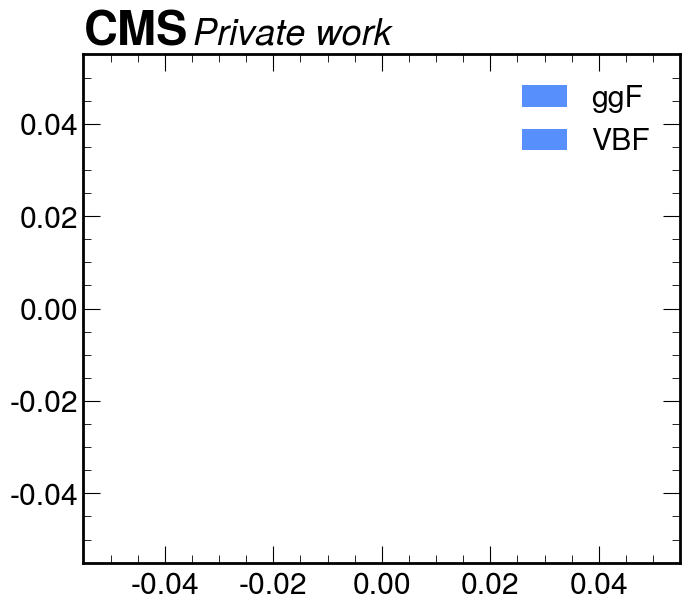

In [496]:
compare_asymmetries(data_storage, 
                    selected_cats=['$\\mu a^{3p}_{1}$'],
                    selected_datasets=['control_plots_full_config',
                                       'Run3_preEE_2022_full_18_feb_fastMTT_GammaH0p004',
                                       'Run3_preEE_2022_full_18_feb_fastMTT_mH0p01',
                                       'VBF_control_plots','VBF_w_MTT'],
                    selected_tags=['IPDP Gen', 'IPDP Reco'],
                    selected_keys=['cp_even_vs_cp_odd'])